In [9]:
!python -m wget https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip


Saved under Chessman-image-dataset.zip


In [19]:
import os
import zipfile
local_zip = 'Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('Chessman-image-dataset')
zip_ref.close()

In [32]:
os.listdir('E:\LearnCode\ComputerVision\Chessman-image-dataset\Chessman-image-dataset\Chess')

['Bishop', 'King', 'Knight', 'Pawn', 'Queen', 'Rook']

In [33]:
print('total pawn images :', len(os.listdir('E:\LearnCode\ComputerVision\Chessman-image-dataset\Chessman-image-dataset\Chess\Pawn')))
print('total King images :', len(os.listdir('E:\LearnCode\ComputerVision\Chessman-image-dataset\Chessman-image-dataset\Chess\King')))
print('total Knight images :', len(os.listdir('E:\LearnCode\ComputerVision\Chessman-image-dataset\Chessman-image-dataset\Chess\Knight')))

total pawn images : 107
total King images : 76
total Knight images : 106


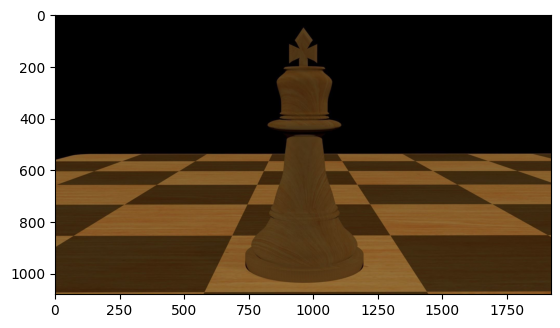

In [35]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('E:\LearnCode\ComputerVision\Chessman-image-dataset\Chessman-image-dataset\Chess\King/00000145.png')
imgplot = plt.imshow(img)

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 
train_dir = os.path.join('E:\LearnCode\ComputerVision\Chessman-image-dataset\Chessman-image-dataset\Chess')
train_datagen = ImageDataGenerator(rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode = 'nearest',
    validation_split=0.1) # set validation split

In [37]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=8,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(150, 150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [38]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),  
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')  
])

In [39]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [41]:
history = model.fit(train_generator,
                              validation_data=validation_generator,
                              epochs=50,
                              verbose=1)

Epoch 1/50
63/63 [==============================] - 14s 216ms/step - loss: 1.7922 - accuracy: 0.2044 - val_loss: 1.7846 - val_accuracy: 0.1923
Epoch 2/50
63/63 [==============================] - 12s 193ms/step - loss: 1.7904 - accuracy: 0.1964 - val_loss: 1.7766 - val_accuracy: 0.1923
Epoch 3/50
63/63 [==============================] - 12s 193ms/step - loss: 1.7379 - accuracy: 0.2565 - val_loss: 1.7240 - val_accuracy: 0.2885
Epoch 4/50
63/63 [==============================] - 12s 194ms/step - loss: 1.7046 - accuracy: 0.2745 - val_loss: 1.7224 - val_accuracy: 0.3077
Epoch 5/50
63/63 [==============================] - 12s 192ms/step - loss: 1.6920 - accuracy: 0.2445 - val_loss: 1.7328 - val_accuracy: 0.3269
Epoch 6/50
63/63 [==============================] - 12s 192ms/step - loss: 1.6210 - accuracy: 0.3407 - val_loss: 1.5504 - val_accuracy: 0.3269
Epoch 7/50
63/63 [==============================] - 12s 189ms/step - loss: 1.5822 - accuracy: 0.3487 - val_loss: 1.5337 - val_accuracy: 0.4231

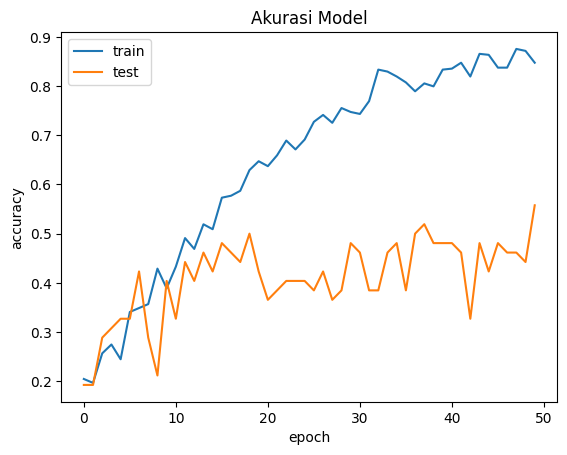

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

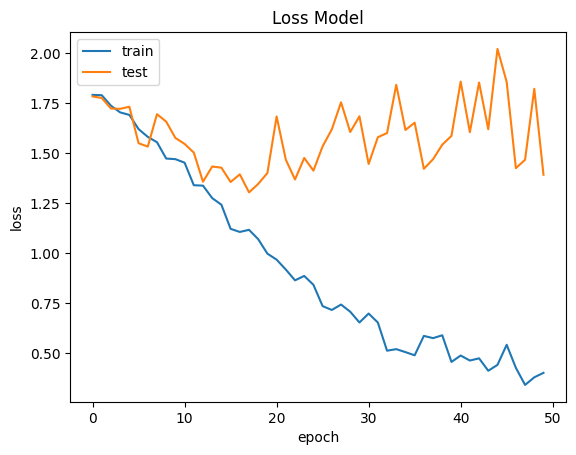

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()